# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [2]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [3]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

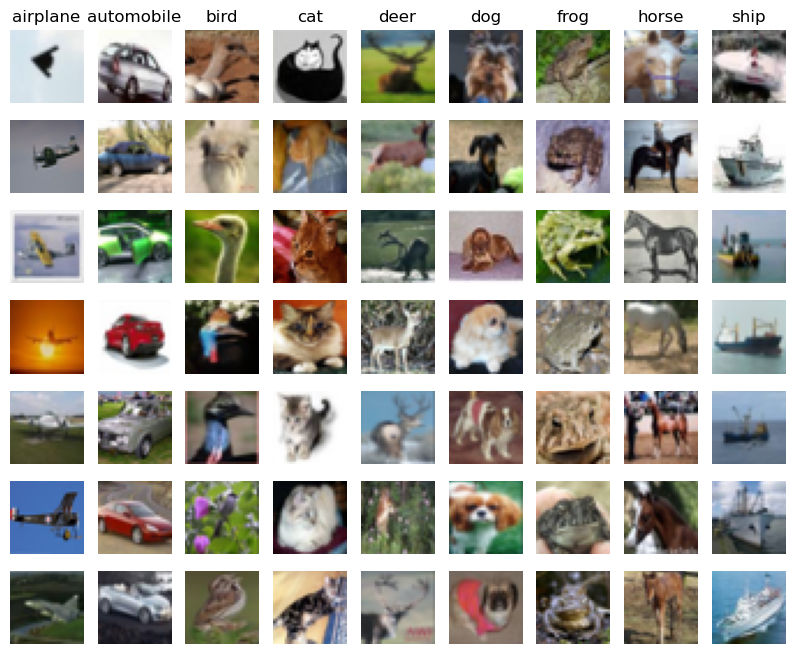

In [4]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [5]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [7]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.278774
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.228364
Validate Acc: 0.112
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.190910
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.167172
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.150296
Validate Acc: 0.140
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

Epoch Average Loss: 2.137175
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.124434
Validate Acc: 0.160
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.112579
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.097752
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.077344
Validate Acc: 0.224
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.055398
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.003072
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.990908
Validate Acc: 0.272
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.978848
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.912537
Valid

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.896201
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.883256
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.867741
Validate Acc: 0.288
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.854666
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.842442
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

Epoch Average Loss: 1.814115


### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3436
Validation acc:  0.324


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

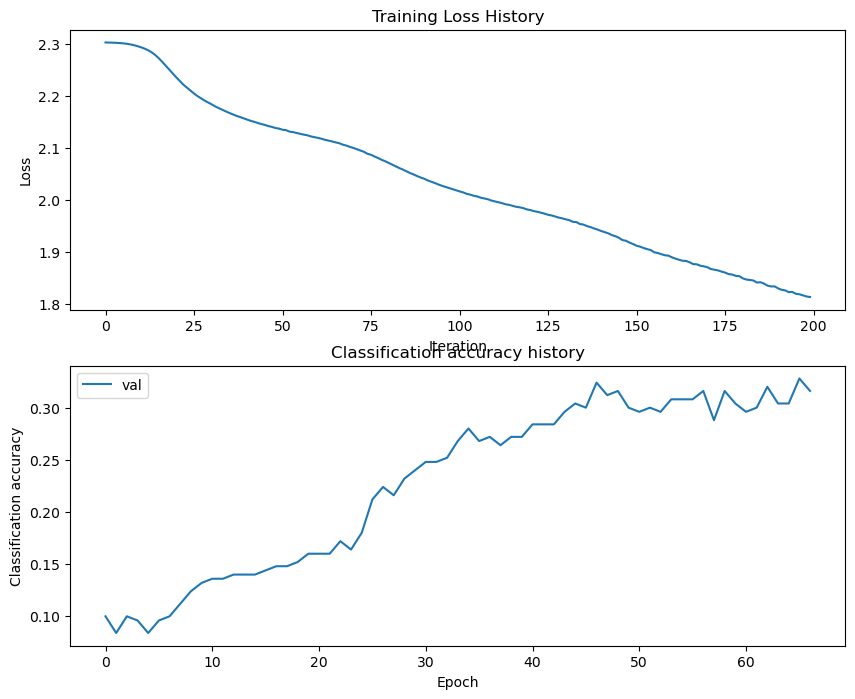

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


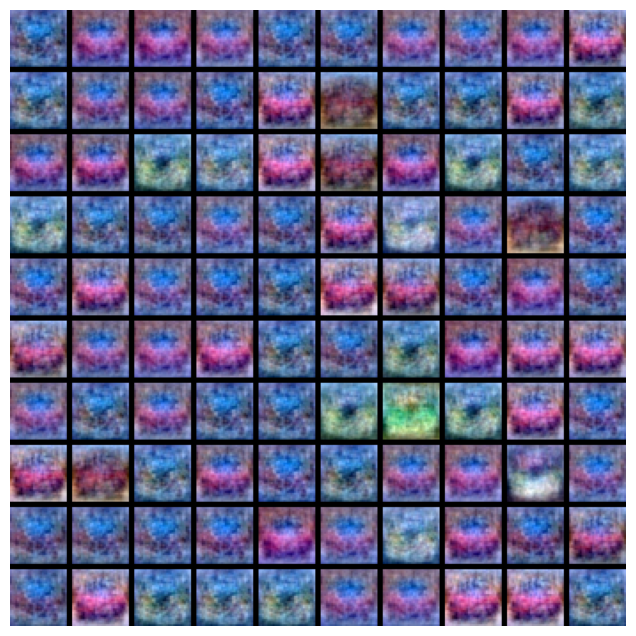

In [11]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

In [12]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

# lr_array = [0.04, 0.06]
# weight_decay_array = [0.01, 0.02]
# epochs_array = [200, 500]
# hidden_size_arr = [100,150]

input_size = 3072
# hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output


def init_model(hidden_size):
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

def train_model(lr, weight_decay, epoch, hidden_size):

    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = init_model(hidden_size)
    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()
    epoch = epoch  # (Hyper-parameter)
    batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


    # Initialize the trainer class by passing the above modules
    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )


    train_error, validation_accuracy = trainer.train()
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
#     print("Training acc: ", acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    return acc
#     print("Validation acc: ", acc)


best_lr =0
best_weight_decay = 0
best_epochs = 0
best_hidden_size = 0

hyper_parameters_1 = [0.02, 0.02, 200, 150]
hyper_parameters_2 = [0.02, 0.02, 200, 100]

hyper_parameters_3 = [0.02, 0.01, 500, 100]
hyper_parameters_4 = [0.04, 0.01, 500, 100]
hyper_parameters_5 = [0.04, 0.01, 200, 100]

validation_accuracy = train_model(hyper_parameters_1[0], hyper_parameters_1[1], hyper_parameters_1[2], hyper_parameters_1[3])
print(validation_accuracy)

# best_validation_accuracy = 0
# for lr in lr_array:
#     for weight_decay in weight_decay_array:
#         for epoch in epochs_array:
#             for hidden_size in hidden_size_arr:
#                 validation_accuracy = train_model(lr, weight_decay, epoch, hidden_size)
#                 if validation_accuracy>best_validation_accuracy:
#                     best_lr = lr
#                     best_weight_decay = weight_decay
#                     best_epochs = epoch
#                     best_hidden_size = hidden_size
#                     best_validation_accuracy = validation_accuracy
#                     print("best validation accuracy till now", best_validation_accuracy)
                


input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.273887
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.151908
Validate Acc: 0.140
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.129646
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.105609
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.065751
Validate Acc: 0.236
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.029948
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.003138
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.957012
Validate Acc: 0.272
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.929810
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.903665
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.881227
Validate Acc: 0.276
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.859129
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.835835
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.819765
Validate Acc: 0.316
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.797683
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.780031
Validate Acc: 0.336
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.763467
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.751693
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.734498
Validate Acc: 0.388
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.715173
Validate Acc: 0.364
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.709071
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.687280
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.681130
Validate Acc: 0.392
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.670047
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

Epoch Average Loss: 1.658728
Validate Acc: 0.392
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

In [16]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

# lr_array = [0.04, 0.06]
# weight_decay_array = [0.01, 0.02]
# epochs_array = [200, 500]
# hidden_size_arr = [100,150]

input_size = 3072
# hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output


def init_model(hidden_size):
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

def train_model(lr, weight_decay, epoch, hidden_size):

    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = init_model(hidden_size)
    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()
    epoch = epoch  # (Hyper-parameter)
    batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


    # Initialize the trainer class by passing the above modules
    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )


    train_error, validation_accuracy = trainer.train()
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
#     print("Training acc: ", acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    return acc
#     print("Validation acc: ", acc)


best_lr =0
best_weight_decay = 0
best_epochs = 0
best_hidden_size = 0

hyper_parameters_1 = [0.02, 0.02, 200, 150]
hyper_parameters_2 = [0.02, 0.02, 200, 100]

hyper_parameters_3 = [0.02, 0.01, 500, 100]
hyper_parameters_4 = [0.04, 0.01, 500, 100]
hyper_parameters_5 = [0.04, 0.01, 200, 100]

validation_accuracy = train_model(hyper_parameters_2[0], hyper_parameters_2[1], hyper_parameters_2[2], hyper_parameters_2[3])
print(validation_accuracy)          


input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

Validate Acc: 0.084
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape 

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.153301
Validate Acc: 0.148
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.131363
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.110537
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.076977
Validate Acc: 0.224
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.038556
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.011786
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.961759
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.923928
Validate Acc: 0.300
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.893137
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.870958
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.842930
Validate Acc: 0.296
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.818565
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.806261
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.789217
Validate Acc: 0.332
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.773652
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.751925
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.744479
Validate Acc: 0.372
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.727986
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.713643
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.698089
Validate Acc: 0.368
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.684467
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.682777
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.657848
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.653639
Validate Acc: 0.380
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

In [17]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

# lr_array = [0.04, 0.06]
# weight_decay_array = [0.01, 0.02]
# epochs_array = [200, 500]
# hidden_size_arr = [100,150]

input_size = 3072
# hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output


def init_model(hidden_size):
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

def train_model(lr, weight_decay, epoch, hidden_size):

    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = init_model(hidden_size)
    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()
    epoch = epoch  # (Hyper-parameter)
    batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


    # Initialize the trainer class by passing the above modules
    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )


    train_error, validation_accuracy = trainer.train()
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
#     print("Training acc: ", acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    return acc
#     print("Validation acc: ", acc)


best_lr =0
best_weight_decay = 0
best_epochs = 0
best_hidden_size = 0

hyper_parameters_1 = [0.02, 0.02, 200, 150]
hyper_parameters_2 = [0.02, 0.02, 200, 100]

hyper_parameters_3 = [0.02, 0.01, 500, 200]
hyper_parameters_4 = [0.04, 0.01, 500, 200]
hyper_parameters_5 = [0.04, 0.01, 200, 200]

validation_accuracy = train_model(hyper_parameters_3[0], hyper_parameters_3[1], hyper_parameters_3[2], hyper_parameters_3[3])
print(validation_accuracy)          


input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

Validate Acc: 0.096
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape 

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.193685
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.017309
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.987428
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.946327
Validate Acc: 0.268
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.917382
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.887548
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.863639
Validate Acc: 0.300
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.838211
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.816996
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

Validate Acc: 0.344
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape 

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.762916
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.743054
Validate Acc: 0.356
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.729021
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.704984
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.682246
Validate Acc: 0.408
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.682941
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.667318
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.651931
Validate Acc: 0.368
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.631151
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.619124
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

Validate Acc: 0.400
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape 

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.604833
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.586705
Validate Acc: 0.416
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.564694
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.557723
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.555448
Validate Acc: 0.392
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.533185
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.541779
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.520888
Validate Acc: 0.408
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.489874
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.489893
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.475736
Validate Acc: 0.420
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.474001
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.485636
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.458118
Validate Acc: 0.392
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.437452
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.412470
Validate Acc: 0.440
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.401570
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.386018
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.383567
Validate Acc: 0.432
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.390627
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.368851
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.359861
Validate Acc: 0.420
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.363662
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.339922
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.341546
Validate Acc: 0.436
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.314358
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.337503
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.302787
Validate Acc: 0.408
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.325500
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.331512
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.314205
Validate Acc: 0.440
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.303981
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.300263
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.277185
Validate Acc: 0.432
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.271295
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.280351
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.259273
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.243024
input

In [21]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

# lr_array = [0.04, 0.06]
# weight_decay_array = [0.01, 0.02]
# epochs_array = [200, 500]
# hidden_size_arr = [100,150]

input_size = 3072
# hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output


def init_model(hidden_size):
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

def train_model(lr, weight_decay, epoch, hidden_size):

    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = init_model(hidden_size)
    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()
    epoch = epoch  # (Hyper-parameter)
    batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


    # Initialize the trainer class by passing the above modules
    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )


    train_error, validation_accuracy = trainer.train()
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
#     print("Training acc: ", acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    return acc
#     print("Validation acc: ", acc)


best_lr =0
best_weight_decay = 0
best_epochs = 0
best_hidden_size = 0

hyper_parameters_1 = [0.02, 0.02, 200, 150]
hyper_parameters_2 = [0.02, 0.02, 200, 100]

hyper_parameters_3 = [0.02, 0.01, 500, 200]
hyper_parameters_4 = [0.04, 0.01, 500, 200]
hyper_parameters_5 = [0.04, 0.01, 200, 200]

validation_accuracy = train_model(hyper_parameters_4[0], hyper_parameters_4[1], hyper_parameters_4[2], hyper_parameters_4[3])
print(validation_accuracy)          


input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.184657
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.127986
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.055460
Validate Acc: 0.228
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.994246
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.844516
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.782054
Validate Acc: 0.336
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

Epoch Average Loss: 1.761411
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.727518
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.694038
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.679977
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.678633
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.630944
Validate Acc: 0.372
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.604288
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.548727
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.563328
Validate Acc: 0.424
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.537535
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.488393
Validate Acc: 0.384
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.506126
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.477977
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.491962
Validate Acc: 0.420
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.455022
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.408780
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.423767
Validate Acc: 0.424
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.413495
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.424241
Validate Acc: 0.388
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.371052
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.373571
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.371380
Validate Acc: 0.396
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.372515
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.365578
Validate Acc: 0.424
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.337687
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.344312
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.335294
Validate Acc: 0.444
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.335006
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.323994
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.279045
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.307878
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.318036
Validate Acc: 0.392
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.307999
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.261490
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.246840
Validate Acc: 0.448
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.259142
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.288592
Validate Acc: 0.436
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.230229
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.222504
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.225057
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.226535
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.236679
Validate Acc: 0.420
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.152098
Validate Acc: 0.400
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.184915
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.197327
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.165186
Validate Acc: 0.432
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.165583
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.197035
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.174710
Validate Acc: 0.432
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.184937
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.169386
Validate Acc: 0.428
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.127375
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.165955
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

In [22]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)

# TODO: visualize the weights of the best network (5%)

from ece285.utils.evaluation import get_classification_accuracy

input_size = 3072
# hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output


def init_model(hidden_size):
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

lr = hyper_parameters_4[0]
weight_decay = hyper_parameters_4[1]
epoch = hyper_parameters_4[2]
hidden_size = hyper_parameters_4[3]

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
best_net = init_model(hidden_size)
optim = SGD(best_net, lr=lr, weight_decay=weight_decay)
loss_func = CrossEntropyLoss()
epoch = epoch  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, best_net, loss_func, epoch, batch_size, validate_interval=3
)


train_error, validation_accuracy = trainer.train()




input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.128476
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 2.058077
Validate Acc: 0.256
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.997550
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.942889
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.887648
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.849547
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.794846
Validate Acc: 0.340
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.779311
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.707753
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.697929
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.664377
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.665022
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.645959
Validate Acc: 0.368
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.585026
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.602519
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.601498
Validate Acc: 0.372
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.550375
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.525590
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.501311
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.507176
Validate Acc: 0.384
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.470608
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.426611
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.430160
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.406131
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.396622
Validate Acc: 0.464
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.355785
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.380184
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.353232
Validate Acc: 0.416
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.353939
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.293664
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.333125
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.313411
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.275861
Validate Acc: 0.420
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.278031
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.258620
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.299451
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.288674
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.276993
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.251857
Validate Acc: 0.448
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.266691
Validate Acc: 0.380
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.213878
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.253172
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.219408
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.227632
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.216994
Validate Acc: 0.424
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.237514
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.212090
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.170102
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.235861
Validate Acc: 0.448
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.181869
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.200056
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y s

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.167464
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.190618
Validate Acc: 0.456
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.166932
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.143973
Validate Acc: 0.432
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.160679
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.146854
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input

input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
Epoch Average Loss: 1.149635
Validate Acc: 0.448
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_y shape (200,)
input_x shape (200, 10)
target_

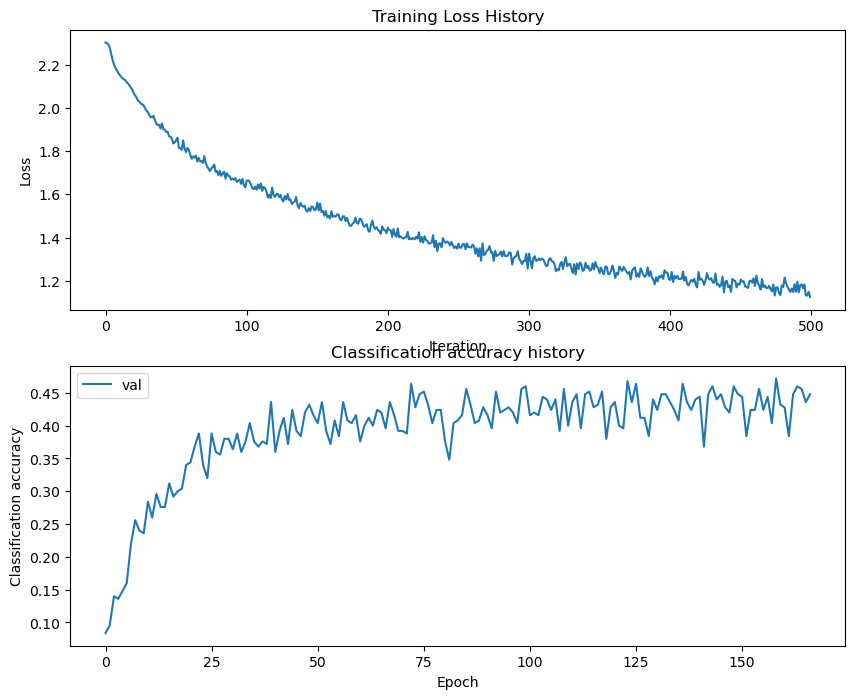

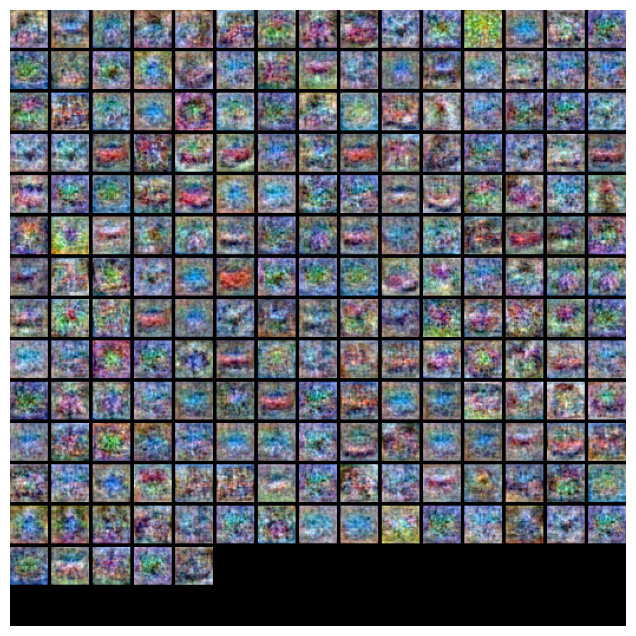

In [23]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()

def show_net_weights(best_net):
    W1 = best_net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(best_net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [24]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)


Test accuracy:  0.366


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer:

#### Your Explanation: